### SpaceX Capstone Project

In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv("E:\Python\DataBase\Spacex.csv")

# Quick view
print(data.head())
print(data.info())


         Date Time (UTC) Booster_Version  Launch_Site  \
0  04-06-2010   18.45.00  F9 v1.0  B0003  CCAFS LC-40   
1  08-12-2010   15.43.00  F9 v1.0  B0004  CCAFS LC-40   
2  22-05-2012    7.44.00  F9 v1.0  B0005  CCAFS LC-40   
3  08-10-2012    0.35.00  F9 v1.0  B0006  CCAFS LC-40   
4  01-03-2013   15.10.00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

In [4]:
data.columns

Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')

In [6]:
# Clean time column: convert 18.45.00 → 18:45:00
data["Time (UTC)"] = data["Time (UTC)"].str.replace(".", ":", regex=False)

# Combine columns
data["Datetime"] = data["Date"] + " " + data["Time (UTC)"]

# Convert to datetime with correct format
data["Datetime"] = pd.to_datetime(data["Datetime"], format="%d-%m-%Y %H:%M:%S")

print(data[["Date", "Time (UTC)", "Datetime"]].head())

         Date Time (UTC)            Datetime
0  04-06-2010   18:45:00 2010-06-04 18:45:00
1  08-12-2010   15:43:00 2010-12-08 15:43:00
2  22-05-2012    7:44:00 2012-05-22 07:44:00
3  08-10-2012    0:35:00 2012-10-08 00:35:00
4  01-03-2013   15:10:00 2013-03-01 15:10:00


In [8]:
# Fix Time column (replace . with :)
data["Time (UTC)"] = data["Time (UTC)"].astype(str).str.replace(".", ":", regex=False)

# Create Datetime column
data["Datetime"] = pd.to_datetime(
    data["Date"] + " " + data["Time (UTC)"],
    format="%d-%m-%Y %H:%M:%S",
    errors="coerce"
)

# Show failed rows (if any)
print("Failed rows:", data["Datetime"].isna().sum())
print(data[data["Datetime"].isna()][["Date", "Time (UTC)"]].head())

Failed rows: 0
Empty DataFrame
Columns: [Date, Time (UTC)]
Index: []


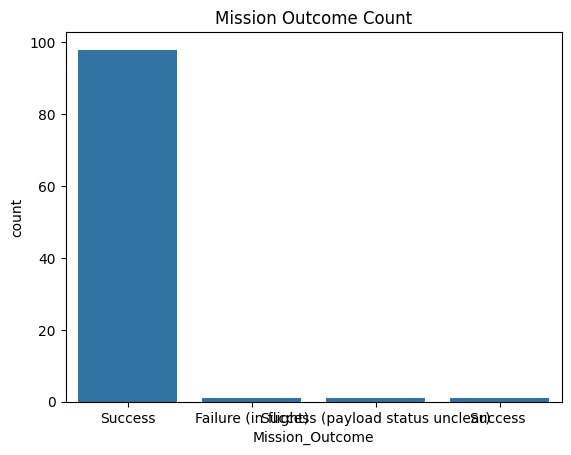

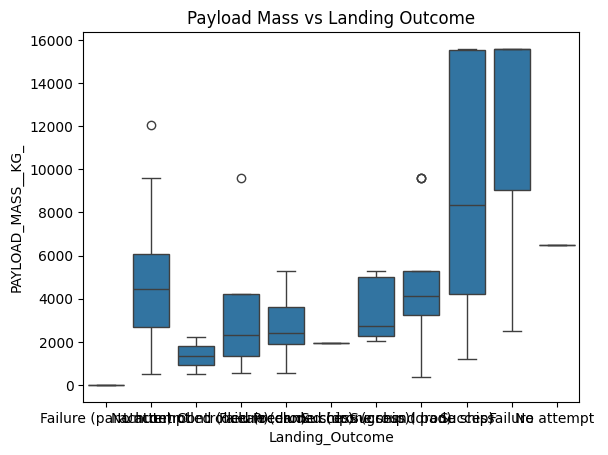

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Mission Outcomes
sns.countplot(x='Mission_Outcome', data=data)
plt.title('Mission Outcome Count')
plt.show()

# Landing Outcome vs Payload Mass
sns.boxplot(x='Landing_Outcome', y='PAYLOAD_MASS__KG_', data=data)
plt.title('Payload Mass vs Landing Outcome')
plt.show()


In [10]:
import sqlite3

# Create in-memory SQL database
conn = sqlite3.connect(':memory:')
data.to_sql('SpaceX', conn, index=False)

# Query: Count of successful landings per Launch Site
query = """
SELECT Launch_Site, COUNT(*) AS Success_Count
FROM SpaceX
WHERE Landing_Outcome = 'Success'
GROUP BY Launch_Site
"""
sql_result = pd.read_sql(query, conn)
print(sql_result)


    Launch_Site  Success_Count
0  CCAFS SLC-40             22
1    KSC LC-39A             10
2   VAFB SLC-4E              6


In [13]:
data.columns

Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome', 'Datetime'],
      dtype='object')

In [15]:
import os

# Create output folder if it doesn't exist
os.makedirs("output", exist_ok=True)


In [17]:
import folium


# Create output folder
os.makedirs("output", exist_ok=True)

# Known coordinates for launch sites
site_coords = {
    "CCAFS SLC 40": [28.561857, -80.577366],
    "KSC LC 39A": [28.608058, -80.603956],
    "VAFB SLC 4E": [34.632093, -120.610829]
}

# Create map
launch_map = folium.Map(location=[28.5, -80.5], zoom_start=5)

# Add markers
for idx, row in data.iterrows():
    site = row['Launch_Site']
    
    if site in site_coords:
        folium.Marker(
            location=site_coords[site],
            popup=f"{site}<br>Payload: {row['PAYLOAD_MASS__KG_']} kg<br>Landing: {row['Landing_Outcome']}",
            icon=folium.Icon(
                color='green' if row['Landing_Outcome'] == 'Success' else 'red'
            )
        ).add_to(launch_map)

# Save map
launch_map.save("output/launch_site_map.html")

print("Map saved successfully! → output/launch_site_map.html")


Map saved successfully! → output/launch_site_map.html


In [20]:
data.columns

Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome', 'Datetime'],
      dtype='object')

In [26]:
data.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome,Datetime
0,04-06-2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute),2010-06-04 18:45:00
1,08-12-2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),2010-12-08 15:43:00
2,22-05-2012,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt,2012-05-22 07:44:00
3,08-10-2012,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,2012-10-08 00:35:00
4,01-03-2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,2013-03-01 15:10:00


In [27]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
df = pd.read_csv(url)

df.head()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [30]:
df.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [35]:
import pandas as pd

url_y = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df_y = pd.read_csv(url_y)

df_y.head()
df_y.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [36]:
X = df     # the dataframe you showed
y = df_y['Class']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.01,0.1,1,10], "max_iter":[500,1000]}
lr = LogisticRegression()

lr_cv = GridSearchCV(lr, parameters, cv=5)
lr_cv.fit(X_train, y_train)

print("Best LR:", lr_cv.best_params_)
print("LR Accuracy:", lr_cv.score(X_test, y_test))


C:\Users\SANGATI DAVEEDU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SANGATI DAVEEDU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-

Best LR: {'C': 0.1, 'max_iter': 500}
LR Accuracy: 0.8888888888888888


C:\Users\SANGATI DAVEEDU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SANGATI DAVEEDU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://sciki

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.1,1], "max_iter":[300]}
lr = LogisticRegression()

lr_cv = GridSearchCV(lr, parameters, cv=3)
lr_cv.fit(X_train, y_train)

print("Best LR:", lr_cv.best_params_)
print("LR Accuracy:", lr_cv.score(X_test, y_test))


C:\Users\SANGATI DAVEEDU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SANGATI DAVEEDU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-

Best LR: {'C': 1, 'max_iter': 300}
LR Accuracy: 0.9444444444444444


C:\Users\SANGATI DAVEEDU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SANGATI DAVEEDU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-

In [46]:
print("Best LR:", lr_cv.best_params_)
print("LR Accuracy:", lr_cv.score(X_test, y_test))

Best LR: {'C': 1, 'max_iter': 300}
LR Accuracy: 0.9444444444444444


In [43]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[3,5]}
knn = GridSearchCV(KNeighborsClassifier(), parameters, cv=3)

knn.fit(X_train, y_train)

print("Best KNN:", knn.best_params_)
print("KNN Accuracy:", knn.score(X_test, y_test))


Best KNN: {'n_neighbors': 3}
KNN Accuracy: 0.5


In [44]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini','entropy'], 'max_depth':[4,6]}
dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3)

dt.fit(X_train, y_train)

print("Best DT:", dt.best_params_)
print("DT Accuracy:", dt.score(X_test, y_test))


Best DT: {'criterion': 'gini', 'max_depth': 6}
DT Accuracy: 0.9444444444444444
